In [1]:
import tweepy
import pandas as pd
import networkx as nx
import numpy as np
import collections
from matplotlib import pyplot as plt

In [2]:
consumer_key=  'XXXXXXXXXXXXXXXXXXXXX'
consumer_secret= 'XXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token= '1472558789698019330-XXXXXXXXXXXXXXXXXXXXXXXX'
access_token_secret= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
bearer_token='XXXXXXXXXXXXXXXXXXXXXXXXX'

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

In [5]:
dict_pes= dict()
for j in nodes:
  u = api.get_user(j)
  dict_pes[j] = u.screen_name

In [4]:
#saving dict_pes in another dict nodes
nodes= {473729548: 'BigShukk',
 1344738920: 'tangy_31',
 1429603854: 'GauthamYS',
 1468957860: 'akaboss2001',
 2228020669: 'chandradharrao1',
 2469365941: 'gimmetechtip',
 2838973913: 'shamanth_km',
 2872401203: 'aditeyabaral01',
 2876732521: 'govardhnn',
 3034153315: 'vibhamasti',
 3220242762: 'kpb1331',
 3221574320: 'aditya_ng_5',
 3274572859: 'kunal_49_bhat',
 3274985820: 'viishruth',
 3320026471: 'thundercookie_',
 705763745079791617: 'AronyaBaksy',
 721713204980817927: 'Shaylaw_Holmes',
 725384293766291456: 'utkarsh_gupt',
 745566943080394752: '2ez4TejuVG',
 746327100257271816: 'roysti10',
 771622961153396736: 'hariprasadn99',
 780439554784366592: 'zotako01',
 795674214690918400: 'bhuvan_18007',
 802416910813933568: 'kapasiayush',
 831682449864286208: 'sachinshankar01',
 834992149758255104: 'pramathharish',
 848901692091506688: 'Dhruva_dodo',
 850556860411269121: 'ayushggod',
 860040731674775552: 'idekanymorepls',
 883720758723092480: 'LokeshUvaraj',
 902853369332547585: 'AmoghK18',
 958759926549147649: 'La_Ruim',
 1000797725917499393: 'SanjanaPrasad17',
 1004642350553968640: 'GbHaritha',
 1071853071142141952: 'nishsathish10',
 1098839084162789376: 'Tanya21Arora',
 1133076940842102784: 'anniem3m3',
 1150712699505897473: 'Sammith130',
 1168038336541286400: 'avi1005_',
 1184475769482825728: 'vinaypnaidu27',
 1192409641273065473: 'SBhaktharam',
 1196316777279393792: 'dahalesourabh',
 1242738027249586176: 'fireballlpapi',
 1246014522537603072: 'DhruvaPrasad7',
 1247213980797427724: 'notsamyuktha',
 1248995104817324034: 'darshilshahaha',
 1249295950549401600: 'SiddharthSoora',
 1249343092957655042: 'Bharg4v',
 1251386586383527936: 'anki_ankii',
 1253945298461708291: 'rithikapaii',
 1273713079587463173: 'SamarthMathur7',
 1277637088842784769: 'DashoraMahim',
 1277807884861009921: 'RiteshSapata',
 1277835126236274688: 'tabsOverSpaces_',
 1278655748768063490: 'Sushant77437897',
 1280037324504526848: 'doodhwalaaa',
 1284839845861273602: 'mehtreyi',
 1287594949228150784: 'TharunJ30',
 1289636412921229312: 'rithiikashankar',
 1300814862130360320: 'YashiChawla',
 1303161128873156608: 'amritaaramesh',
 1305910070782251009: 'ananyeeah',
 1317498004199256064: 'binarydreamtree',
 1351451066622119937: 'DevangaAnusha',
 1355748483127369730: 'Parziva46048757',
 1357736121535397888: 'notYummmm',
 1366336069319335943: 'ArooKrishna',
 1382680394349236228: 'shreyasri01',
 1403983669908303874: 'standardsardard',
 1424433180753371139: 'ISrujanKumar510',
 1428587673116037121: 'SanjanaKoppella',
 1436187424506277898: 'math_with_an_e',
 1460180698556297221: 'AishwaryaBS06',
 1471504126890557446: 'Shawshankgbhat',
 1472558789698019330: 'gaya3cantshutup',
 1473893833461043203: 'dhrvmenon',
 1475691974845886464: 'smrithihihi',
 1477144962286243849: 'Ashwath_Kris',
 1483029280699588608: 'Gils_Paul13',
 1489178779738013698: 'bigsid06',
 1497605466968723504: 'therealtushi',
 1497823537679114241: 'GoldBlood242'}

In [7]:
df = pd.read_csv('/content/updated_pes.csv') 
df = df.iloc[:, 1:]
df.replace({"source": dict_pes},inplace=True)
df.replace({"target": dict_pes},inplace=True)
df

,source,target
0,gaya3cantshutup,ISrujanKumar510
1,gaya3cantshutup,Bharg4v
2,gaya3cantshutup,Ashwath_Kris
3,gaya3cantshutup,dahalesourabh
4,gaya3cantshutup,vinaypnaidu27
...,...,...
2295,math_with_an_e,zotako01
2296,math_with_an_e,idekanymorepls
2297,math_with_an_e,vibhamasti
2298,math_with_an_e,darshilshahaha


In [8]:
G = nx.from_pandas_edgelist(df, 'source', 'target')

In [9]:
#Find the total number of nodes in this graph
G.number_of_nodes() 

82

In [10]:
#degree analysis
G_sorted = pd.DataFrame(sorted(G.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['nconst','degree']
G_sorted.head(50)

,nconst,degree
0,math_with_an_e,70
1,gaya3cantshutup,69
2,Sammith130,66
3,gimmetechtip,64
4,ananyeeah,63
5,AronyaBaksy,61
6,ayushggod,60
7,zotako01,60
8,aditeyabaral01,59
9,vibhamasti,54


K-core

In [11]:
G_tmp = nx.k_core(G, 10) #Exclude nodes with degree less than 10

In [12]:
from community import community_louvain
partition = community_louvain.best_partition(G_tmp)
#Turn partition into dataframe
partition1 = pd.DataFrame([partition]).T
partition1 = partition1.reset_index()
partition1.columns = ['names','group']

In [13]:
G_sorted = pd.DataFrame(sorted(G_tmp.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['names','degree']
G_sorted.head()
dc = G_sorted

In [14]:
combined = pd.merge(dc,partition1, how='left', left_on="names",right_on="names")

In [16]:
# pos = nx.spring_layout(G_tmp)
# f, ax = plt.subplots(figsize=(20, 16))
# plt.style.use('ggplot')
# nodes = nx.draw_networkx_nodes(G_tmp, pos,
#                                cmap=plt.cm.Set1,
#                                node_color=combined['group'],
#                                alpha=0.9)
# nodes.set_edgecolor('k')
# nx.draw_networkx_labels(G_tmp, pos, font_size=8)
# nx.draw_networkx_edges(G_tmp, pos, width=2.0, alpha=0.2)

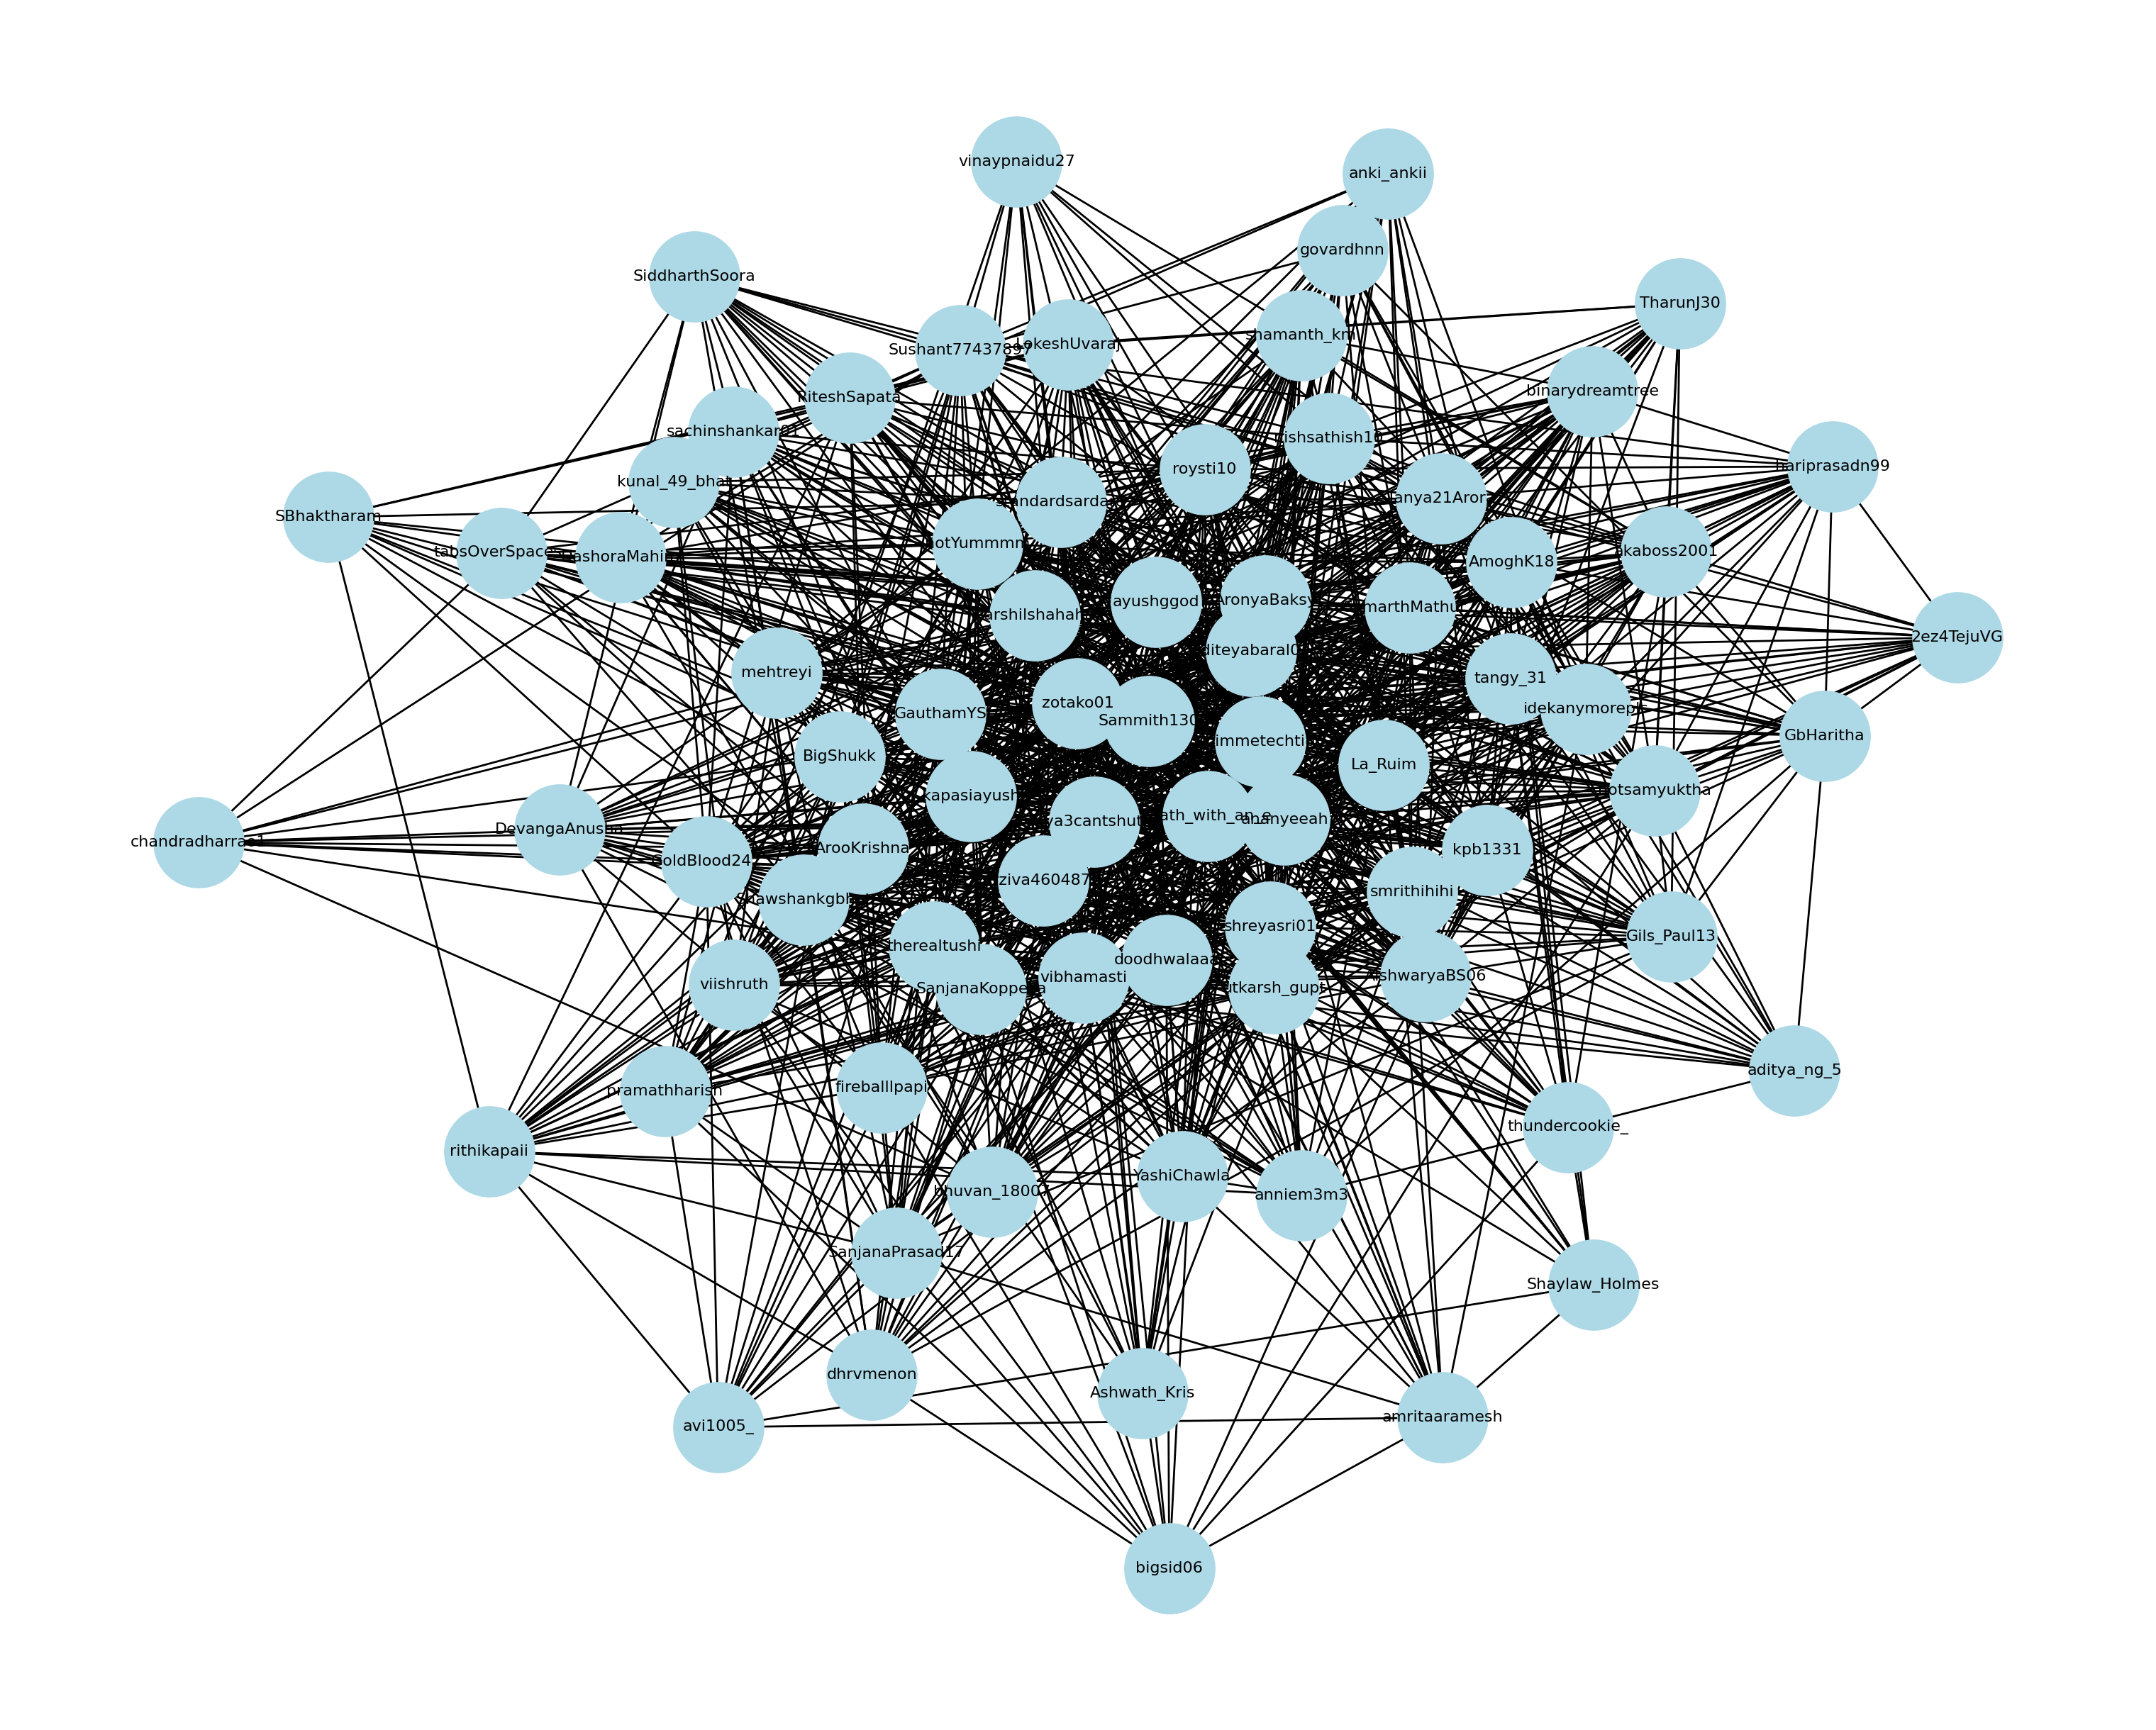

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(3,figsize=(15,12), dpi=200) 
nx.draw(G_tmp, with_labels=True, node_size=2100, font_size=8, node_color="lightblue")
plt.show()
plt.savefig('twitterFollowers.png')

In [19]:
!pip install pyvis

In [20]:
from pyvis.network import Network
net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')

net.barnes_hut()
sources = df['source']
targets = df['target']

edge_data = zip(sources, targets)

for e in edge_data:
    src = e[0]
    dst = e[1]
    

    net.add_node(src, src, title=src)
    net.add_node(dst, dst, title=dst)
    net.add_edge(src, dst)

neighbor_map = net.get_adj_list()

for node in net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])

#generating an interactive visualisation, open and zoom in and click on nodes to see
net.show('pes-twt.html')